In [1]:
import networkx as nx

In [7]:
G1 = nx.Graph() # ненаправленный граф, нельзя множественные ребра, можно петли
G2 = nx.DiGraph() # саблкас от Graph, направленный
G3 = nx.MultiGraph() # множественные ребра
G4 = nx.MultiDiGraph() # сабкласс от MultiGraph направленный

![images/016.png](images/016.png)
Любой хешируемый объект может быть нодой

In [8]:
G1.add_edge(1, 2) # при добавлении ребра, автоматически добавляются ноды, если их нет

In [9]:
G1.add_edge(2, 3, weight=0.9) # вес ребра

In [10]:
import math 
G1.add_edge('y', 'x', function=math.cos) 
G1.add_node(math.cos)
# ноды - любые хешируемые объекты python

In [11]:
elist1 = [(1, 2), (2, 3), (1, 4), (4, 2)]
G1.add_edges_from(elist1)
# можно добавлять из списка кортежей

elist2 = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)] 
G1.add_weighted_edges_from(elist2)
# можно из словарей

In [13]:
for i in G1:
    print(i)
# ранее созданные ноды не дублируются

1
2
3
y
x
<built-in function cos>
4
a
b
c
d


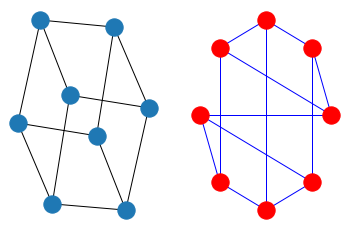

In [18]:
# интерфейс к построению картинок
import matplotlib.pyplot as plt 
G = nx.cubical_graph()
plt.subplot(121)
nx.draw(G)
plt.subplot(122)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

In [19]:
# Для построения структуры данных networkx использует dict-of-dicts of dicts структуру
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'C')
print(G.adj)

{'A': {'B': {}}, 'B': {'A': {}, 'C': {}}, 'C': {'B': {}}}


In [20]:
# Graphs provide two interfaces to the edge data attributes: adjacency and edges. 
# So G[u][v]['width'] is the same as G.edges[u, v]['width']
G = nx.Graph()
G.add_edge(1, 2, color='red', weight=0.84, size=300)
print(G[1][2]['size'])

300


In [21]:
print(G.edges[1, 2]['color'])

red


#### Ненаправленный граф

In [23]:
# варианты добавления нод
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from(range(100, 110))
H = nx.path_graph(10)
G.add_nodes_from(H) # из другого графа
G.add_node(H) # сам граф
for i in G:
    print(i)

1
2
3
100
101
102
103
104
105
106
107
108
109
0
4
5
6
7
8
9



In [24]:
# варианты добавления ребер
G.add_edge(1, 2)
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges)

In [26]:
# каждый граф, нода или ребро имеют атрибуты, которые можно затем извлечь по ключу (хешируемый)
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [2]:
# атрибуты можно задавать в процессе добавления нод и ребер
G = nx.Graph()
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [3]:
# можно через присваивание (если нода уже добавлена в граф)
G.nodes[1]['room'] = 714
list(G.nodes(data=True))

[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'})]

In [4]:
# атрибут можно удалять оператором del
del G.nodes[1]['room']
list(G.nodes(data=True))

[(1, {'time': '5pm'}), (3, {'time': '2pm'})]

In [6]:
# теже фокусы с ребрами
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[1, 2]['weight'] = 4

In [7]:
# networkx поддерживает все питонячьи методы

# проверка вхождения
1 in G

True

In [8]:
# итераторы
[n for n in G if n < 3]

[1, 2]

In [9]:
# встроенные функции
len(G)

5

In [10]:
# итерация по парам соседей
for n, nbrsdict in G.adjacency():
    for nbr, eattr in nbrsdict.items():
        if 'weight' in eattr:
            # Do something useful with the edges
            pass

In [11]:
for u, v, weight in G.edges.data('weight'):
    if weight is not None:
        # Do something useful with the edges
        pass

Методы (изменеение графа)
add_nodes_from разбирает любую последовательность, например строку или список кортежей
add_edges_from из любого списка списков/кортежей, состоящих из пар нод
![images/017.png](images/017.png)

Методы (получение данных графа)
![images/018.png](images/018.png)

![images/019.png](images/019.png)

Другие методы
![images/020.png](images/020.png)

#### DiGraph—Directed graphs with self loops

создание графа - методы теже

Получение данных - чутка побольше

A successor of n is a node m such that there exists a directed edge from n to m.
A predecessor of n is a node m such that there exists a directed edge from m to n.
The nodes in nbunch are checked for membership in the graph and if not are silently ignored.
![images/021.png](images/021.png)

![images/022.png](images/022.png)

![images/023.png](images/023.png)